## 1. Downsampling the image by reducing the number of pixels to about ¼ of the original image. 
## 2. Upsampling the reduced image using Bilinear Interpolation.  

Original image size: (2592, 3888, 3)
Downsampled image size: (1296, 1944, 3)
Pixel ratio: 0.2500
Upsampled image size: (2592, 3888, 3)


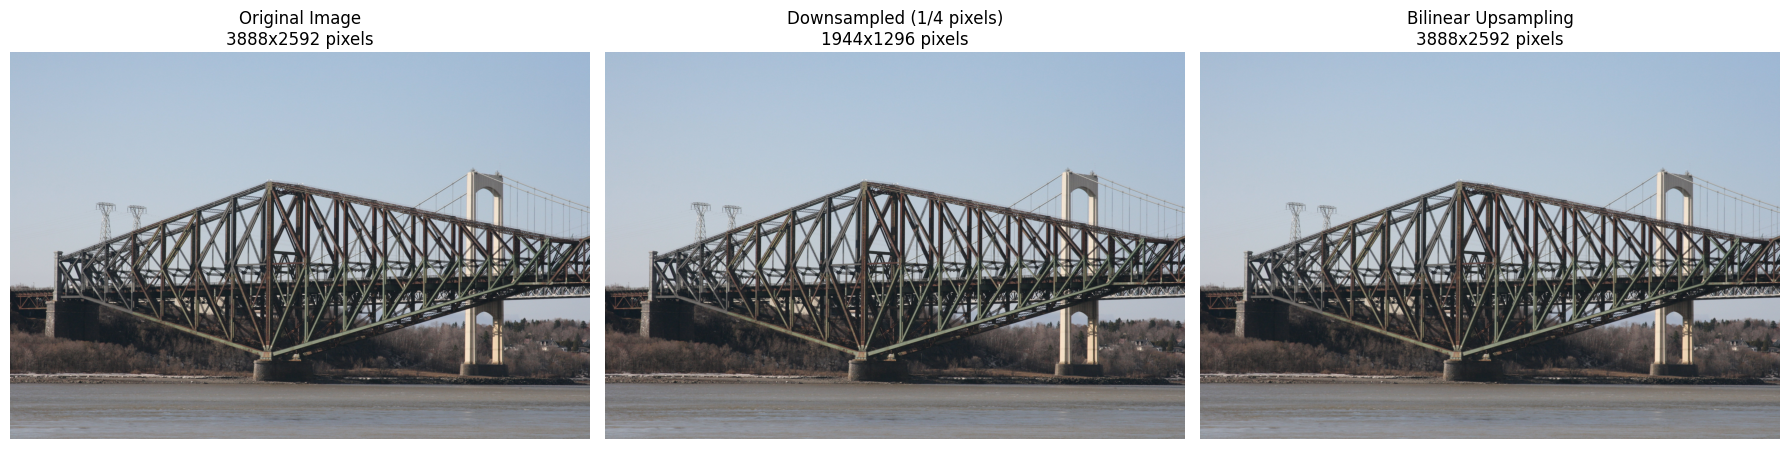

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. 从本地路径加载图片
img_path = r"source\QuebecBridge_EleView.jpg"
img = Image.open(img_path)

# 转换为numpy数组
img_array = np.array(img)
print(f"Original image size: {img_array.shape}")

# 2. 下采样 - 将像素数减少到约四分之一
height, width = img_array.shape[:2]
new_height = height // 2
new_width = width // 2

img_downsampled = img.resize((new_width, new_height), Image.NEAREST)
downsampled_array = np.array(img_downsampled)
print(f"Downsampled image size: {downsampled_array.shape}")
print(f"Pixel ratio: {(new_height * new_width) / (height * width):.4f}")

# 3. 使用双线性插值法进行上采样，恢复到原始尺寸
img_upsampled = img_downsampled.resize((width, height), Image.BILINEAR)
upsampled_array = np.array(img_upsampled)
print(f"Upsampled image size: {upsampled_array.shape}")

# 4. 可视化结果
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_array)
axes[0].set_title(f'Original Image\n{img_array.shape[1]}x{img_array.shape[0]} pixels', fontsize=12)
axes[0].axis('off')

axes[1].imshow(downsampled_array)
axes[1].set_title(f'Downsampled (1/4 pixels)\n{downsampled_array.shape[1]}x{downsampled_array.shape[0]} pixels', fontsize=12)
axes[1].axis('off')

axes[2].imshow(upsampled_array)
axes[2].set_title(f'Bilinear Upsampling\n{upsampled_array.shape[1]}x{upsampled_array.shape[0]} pixels', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 3.Compare the result from upsampling to the original image. How to evaluate the result?

There is no significant difference between the result of upsumpling and the original image in this picture. Maybe it is because When Python reduces these two different-sized images to roughly the same size for display, they will both appear "sharp" in this reduced view, as the loss of detail is concealed.
I will evaluate the result by the methods below:
From a subjective visual perspective, image quality can be assessed by examining the overall clarity and sharpness, the preservation of details and textures, the distinctness of edges and contours, and the absence of any unnatural appearance. For instance, one can evaluate whether structural edges of a bridge remain sharp and whether the background is appropriately blurred.
Conversely, from an objective standpoint, metrics such as Peak Signal-to-Noise Ratio (PSNR) and Structural Similarity Index (SSIM) can be used—values closer to 1 generally indicate higher image quality.